# ONE Introductory Tutorial
In this tutorial we will use ONE to load IBL behavioural data and perform some simple analysis to assess the performance of a chosen subject during the [IBL task](https://www.biorxiv.org/content/10.1101/2020.01.17.909838v2.full).

This tutorial assumes that you have setup the [unified ibl environment](../../02_installation) and authorised access to IBL data through your [ONE credentiasls](../one_credentials/one_credentials). 

Let's get started by importing ONE and setting up a connection

In [1]:
from oneibl.one import ONE
one = ONE()

Connected to https://alyx.internationalbrainlab.org as mayo


We want to look at behavioural data for a subject in a given lab. We can see which labs are available by using,

In [2]:
one.list(None, 'labs')

['hoferlab',
 'mainenlab',
 'angelakilab',
 'wittenlab',
 'danlab',
 'cortexlab',
 'churchlandlab',
 'mrsicflogellab',
 'zadorlab',
 'steinmetzlab']

We will choose a subject from the cortex lab. To find which subjects are available we will use the `one.alyx.rest` command. See [here](../one_advanced/one_advanced) for more information about this command.

In [3]:
subj_info = one.alyx.rest('subjects', 'list', lab='cortexlab')

Let's see how many subjects have been registered under the cortex lab and also examine the content of the first item in subj_info

In [7]:
print(f"No. of subjects in cortex lab = {len(subj_info)}")
subj_info[0]

No. of subjects in cortex lab = 55


{'nickname': 'ALK081',
 'url': 'https://alyx.internationalbrainlab.org/subjects/ALK081',
 'id': 'c68cf5d5-e75a-46f1-8eda-a2db78cf4743',
 'responsible_user': 'armin',
 'birth_date': '2018-04-13',
 'age_weeks': 33,
 'death_date': '2018-12-04',
 'species': None,
 'sex': 'F',
 'litter': 'Pv_L_019',
 'strain': 'C57BL/6J',
 'source': None,
 'line': 'Pvalb-IRES-Cre',
 'projects': ['ibl_behaviour_pilot_matlabrig'],
 'session_projects': ['ibl_behaviour_pilot_matlabrig'],
 'lab': 'cortexlab',
 'genotype': ['Pv-Cre +/-'],
 'description': 'perfused by HF',
 'alive': False,
 'reference_weight': 25.0,
 'last_water_restriction': None,
 'expected_water': 0.9520000000000001,
 'remaining_water': 0.9520000000000001}

Each entry in the list subj_info is a dictionary that contains the details about this subject, including among others details, the nickname, whether the subject is alive or dead and the gender of the subject. We are interested in finding out the possible subject nicknames so we can refine our search. We can quickly iterate over all items in the subj_info list and extract the subject nicknames

In [8]:
subject_names = [subj['nickname'] for subj in subj_info]
print(subject_names)

['ALK081', 'ALK082', 'C57_0077_Breeding', 'CR_IBL1', 'CR_IBL2', 'CtTa_0112_Breeding', 'dop_11', 'KS001', 'KS001_optoproject', 'KS002', 'KS003', 'KS004', 'KS005', 'KS006', 'KS007', 'KS008', 'KS009', 'KS010', 'KS011', 'KS012', 'KS013', 'KS014', 'KS015', 'KS016', 'KS017', 'KS018', 'KS019', 'KS020', 'KS021', 'KS022', 'KS023', 'KS024', 'KS025', 'KS026', 'KS027', 'KS028', 'KS030', 'KS031', 'KS032', 'KS033', 'KS034', 'KS035', 'LEW006', 'LEW008', 'LEW009', 'LEW010', 'M181212_IC1', 'Muller', 'MW001', 'MW002', 'MW003', 'MW004', 'NR_0004', 'Pv_0079_Breeding', 'TetO_0055_Breeding']


Let's choose subject KS022 for further analysis and find all the sessions for this subject using the `one.search` command

In [9]:
eids, sess_info = one.search(subject='KS022', task_protocol='training', details=True)

<div class="alert alert-info">

Note

We have restricted the task_protocol to find sessions that only have trainig data. We could also have restricted this field by `biased` or `ephys` to find sessions where the subject was in a more advanced stage of the [IBL training pipeline](https://figshare.com/articles/A_standardized_and_reproducible_method_to_measure_decision-making_in_mice_Appendix_2_IBL_protocol_for_mice_training/11634729/1)

</div>


By returning the session information for each eID we can extract the date and order our experimental sessions by date (or training days). Let's first look at the content of the first element in `sess_info`

In [10]:
sess_info[0]

{'subject': 'KS022',
 'start_time': '2019-10-22T11:48:05.403000',
 'number': 2,
 'lab': 'cortexlab',
 'project': 'ibl_neuropixel_brainwide_01',
 'url': 'https://alyx.internationalbrainlab.org/sessions/b4ac5904-5693-4d98-adb3-362e612836be',
 'task_protocol': '_iblrig_tasks_trainingChoiceWorld6.0.5',
 'local_path': 'cortexlab\\Subjects\\KS022\\2019-10-22\\002'}

We can see this contains information about the date of the session and so we can quickly collect a list dates for all the training sessions

In [11]:
session_date = [sess['start_time'] for sess in sess_info]

The latest training session date is returned first. For convenienve let's reverse the list so that the first training session day is at index 0, for consistency we must reverse the list of eids as well 

In [12]:
session_date.reverse()
eids.reverse()

We will start by looking at data for the first training day. Let's list what datasets are available using `one.list`

In [13]:
eid_day1 = eids[0]
one.list(eid=eid_day1)

['_ibl_trials.stimOnTrigger_times',
 '_iblrig_Camera.raw',
 '_iblrig_Camera.timestamps',
 '_iblrig_VideoCodeFiles.raw',
 '_iblrig_ambientSensorData.raw',
 '_iblrig_codeFiles.raw',
 '_iblrig_encoderEvents.raw',
 '_iblrig_encoderPositions.raw',
 '_iblrig_encoderTrialInfo.raw',
 '_iblrig_taskData.raw',
 '_iblrig_taskSettings.raw',
 'trials.choice',
 'trials.contrastLeft',
 'trials.contrastRight',
 'trials.feedbackType',
 'trials.feedback_times',
 'trials.firstMovement_times',
 'trials.goCueTrigger_times',
 'trials.goCue_times',
 'trials.included',
 'trials.intervals',
 'trials.probabilityLeft',
 'trials.repNum',
 'trials.response_times',
 'trials.rewardVolume',
 'trials.stimOn_times',
 'wheel.position',
 'wheel.timestamps',
 'wheelMoves.intervals',
 'wheelMoves.peakAmplitude']

In this tutorial we are interested in the in the [trials dataset](https://docs.google.com/spreadsheets/d/1ieLXRPLLSgUKcLvFkrqizfZl5HjdfE6bQ2KLBCRmjQo/edit#gid=1097679410) that contains information about the performance of the subject during the task. We can define a list of all the individual data set types we want to load, for example

In [14]:
d_types = ['trials.choice',
           'trials.contrastLeft']
_ = one.load(eid=eid_day1, dataset_types=d_types)

Alternatively we can take advantage of the ALF file format and download all files that have the prefix trials. 

<div class="alert alert-info">

Note

This would be called loading all attributes associated with the trials object. See [here](../../04_reference#ALF) for more information on the ALF file naming convention that is used in the IBL.

</div>


For this we will use a slightly different loading function `one.load_object`

In [15]:
d_object = 'trials'
_ = one.load_object(eid=eid_day1, obj= d_object)

We can find the path where the data has been downloaded using

In [16]:
data_path = one.path_from_eid(eid_day1)
data_path

WindowsPath('C:/Users/Mayo/Downloads/FlatIron/cortexlab/Subjects/KS022/2019-09-23/001')

The alf module in ibllib contains a useful set of functions that can be used to read in alf objects. Let's import this module and load in all data associated with the trials object.

In [17]:
import alf.io as aio
from pathlib import Path

alf_path = Path(data_path, 'alf')

trials_day1 = aio.load_object(alf_path, '_ibl_trials')

<div class="alert alert-info">

Note

By using `trials_day1 = one.load(eid=eid, data_types=dtypes)` we could have automatically loaded the trials object into memory after downloading the files. Here we have chosen to manually read in the data to introduce the useful functions such `one.path_from_eid` and `alf.io.load_object`

</div>


Let's look at the content of the trials object

In [18]:
print(trials_day1.keys())

dict_keys(['choice', 'contrastLeft', 'contrastRight', 'feedbackType', 'feedback_times', 'firstMovement_times', 'goCueTrigger_times', 'goCue_times', 'included', 'intervals', 'probabilityLeft', 'repNum', 'response_times', 'rewardVolume', 'stimOnTrigger_times', 'stimOn_times'])


We can find how many trials there were in the session by inspecting the length of one of the attributes

In [19]:
n_trials_day1 = len(trials_day1.choice)
print(n_trials_day1)

324


<div class="alert alert-info">

Note

We chose to look at the first attribute of trials oject to find the no. of trials, but we could have looked at the length of any of the attributes and got the same results. This is another consequence of the ALF file format. All attributes associated with a given object will have the same number of rows.

</div>

Next, let's look at the visual stimulus contrasts that were presented to the subject on day 1. For this we will inspect `trials.constrastLeft` dataset

In [20]:
trials_day1.contrastLeft

array([nan, 1. , 1. , 1. , nan, 1. , 1. , nan, 1. , nan, 1. , 1. , nan,
       nan, 0.5, 0.5, nan, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , nan, 0.5, 0.5,
       0.5, nan, 1. , 0.5, nan, 0.5, nan, 0.5, nan, 1. , nan, nan, nan,
       nan, nan, nan, nan, 0.5, nan, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, nan,
       nan, nan, 0.5, 0.5, 0.5, 0.5, 0.5, nan, nan, 0.5, 0.5, 0.5, 0.5,
       nan, 0.5, 0.5, nan, nan, nan, 1. , nan, nan, nan, 1. , nan, 0.5,
       0.5, nan, nan, nan, 1. , nan, 1. , 1. , nan, 1. , nan, nan, nan,
       1. , 0.5, 0.5, 0.5, nan, 0.5, 0.5, 1. , 0.5, 0.5, 1. , nan, 1. ,
       nan, nan, nan, nan, nan, nan, nan, 1. , nan, nan, nan, nan, nan,
       nan, 1. , 0.5, nan, 0.5, nan, nan, 0.5, 0.5, nan, 0.5, nan, nan,
       nan, 1. , 1. , nan, nan, 1. , 1. , 1. , 1. , nan, 1. , 1. , nan,
       1. , nan, 0.5, nan, 0.5, nan, 0.5, nan, 0.5, nan, 1. , 1. , nan,
       0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, nan, 0.5,
       0.5, 0.5, 0.5, nan, 0.5, nan, nan, nan, 0.5, 0.5, 1. , 1.

We have three values 1 which indicates a 100 % visual stimulus contrast, 0.5 which corresponds to a 50 % visual contrast and whole load of nans.....

If we inspect `trials.contrastRight` we will find that all the indices that contain nans in the `trials.contrastLeft` are filled in `trials.contrastRight`, and vice versa. nans in the `trials.contrastLeft` and `trials.contrastRight` datasets indicate that the contrast was show on the oppisite side.

Lets combine `trials.contrastLeft` and `trials.contrastRight` into a new dataset called `trials.contrast`. By convetion in the IBL, contrasts that appear on the left are assigned a negative while those on the right are positive. Let's also reflect this convention when forming our new dataset

In [21]:
import numpy as np

trials_day1.contrast = np.empty((n_trials_day1))
contrastRight_idx = np.where(~np.isnan(trials_day1.contrastRight))[0]
contrastLeft_idx = np.where(~np.isnan(trials_day1.contrastLeft))[0]

trials_day1.contrast[contrastRight_idx] = trials_day1.contrastRight[contrastRight_idx]
trials_day1.contrast[contrastLeft_idx] = -1 * trials_day1.contrastLeft[contrastLeft_idx]


We can inspect how many of each type of contrast was presented to the subject

In [22]:
contrasts, n_contrasts = np.unique(trials_day1.contrast, return_counts=True)
print(f"Visual stimulus contrasts on day 1 = {contrasts * 100}")
print(f"No. of each contrast on day 1 = {n_contrasts}")

Visual stimulus contrasts on day 1 = [-1.  -0.5  0.5  1. ]
No. of each contrast on day 1 = [81 90 73 80]


Finally let's look at how the mouse performed on the first day of training. This information is stored in the `feedbackType` attribute of the `trials` object. A positive feedback (+1) means the mouse got the task correct, whereas a negavtive feedback (-1) means the mouse got the trial wrong. Let's double check that these are the only values we see in `trials.feedbakType`

In [23]:
np.unique(trials_day1.feedbackType)

array([-1,  1], dtype=int64)

We can easily compute the performance of the mouse

In [26]:
correct = np.sum(trials_day1.feedbackType == 1)/ n_trials_day1
print(f"Correct = {correct * 100} %")

Correct = 51.54320987654321 %


As expected on the first day of training the mouse has not yet grasped the concept of the task and performed at chance level. We can break down the performance at each contrast level and create a simple plot. In this plot let's also express performance in terms of rightward choice.

Text(0, 0.5, 'Rightward choice (%)')

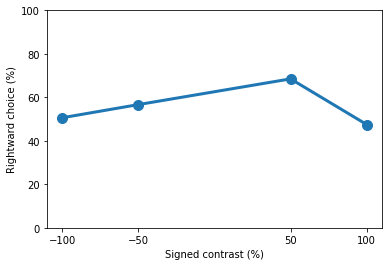

In [35]:
import matplotlib.pyplot as plt

contrast_performance = np.empty((contrasts.size))
for ic, c in enumerate(contrasts):
    contrast_idx = np.where(trials_day1.contrast == c)[0]
    if c < 0:
        contrast_performance[ic] = 1 - (np.sum(trials_day1.feedbackType[contrast_idx] == 1)
                                        / contrast_idx.shape[0])
    else:
        contrast_performance[ic] = (np.sum(trials_day1.feedbackType[contrast_idx] == 1)
                                    / contrast_idx.shape[0])

 
plt.plot(contrasts * 100, contrast_performance * 100, 'o-', lw=3, ms=10)
plt.ylim([0,100])
plt.xticks([*(contrasts * 100)])
plt.xlabel('Signed contrast (%)')
plt.ylabel('Rightward choice (%)')

As the mice learns the task we expect its performance to improve. Let's repeat the steps above and see how the same mouse performed on day 18 of trainng

In [50]:
eid_day18 = eids[17]
trials_day18 = one.load_object(eid=eid_day18, obj=d_object)
n_trials_day18 = len(trials_day18.choice)

trials_day18.contrast = np.empty((n_trials_day18))
contrastRight_idx = np.where(~np.isnan(trials_day18.contrastRight))[0]
contrastLeft_idx = np.where(~np.isnan(trials_day18.contrastLeft))[0]

trials_day18.contrast[contrastRight_idx] = trials_day18.contrastRight[contrastRight_idx]
trials_day18.contrast[contrastLeft_idx] = -1 * trials_day18.contrastLeft[contrastLeft_idx]

contrasts, n_contrasts = np.unique(trials_day18.contrast, return_counts=True)
print(f"Visual stimulus contrasts on day 18 = {contrasts * 100}")
print(f"No. of each contrast on day 18 = {n_contrasts}")

Downloading: C:\Users\Mayo\Downloads\FlatIron\cortexlab\Subjects\KS022\2019-10-21\001\alf\_ibl_trials.feedback_times.0f80c2d1-2901-4deb-94c2-fc100ea0809d.npy Bytes: 5872
Downloading: C:\Users\Mayo\Downloads\FlatIron\cortexlab\Subjects\KS022\2019-10-21\001\alf\_ibl_trials.included.6794db3b-d338-41fe-81ae-7e1413e1251a.npy Bytes: 846
Downloading: C:\Users\Mayo\Downloads\FlatIron\cortexlab\Subjects\KS022\2019-10-21\001\alf\_ibl_trials.goCue_times.4f977826-ebb8-4443-96e5-2b9f5088158e.npy Bytes: 5872
Downloading: C:\Users\Mayo\Downloads\FlatIron\cortexlab\Subjects\KS022\2019-10-21\001\alf\_ibl_trials.contrastRight.3b31b15b-7c2e-4a42-9d2e-86f5f93a1e6e.npy Bytes: 5872
Downloading: C:\Users\Mayo\Downloads\FlatIron\cortexlab\Subjects\KS022\2019-10-21\001\alf\_ibl_trials.contrastLeft.595add75-4b74-4e03-a78a-e922836aa73e.npy Bytes: 5872
Downloading: C:\Users\Mayo\Downloads\FlatIron\cortexlab\Subjects\KS022\2019-10-21\001\alf\_ibl_trials.probabilityLeft.4ee44399-47d6-4af7-8dab-54ce5decf427.npy Byte

Notice how on day 20 the mouse has not only has trials with 100 % and 50 % visual stimuli contrast but also 25 % and 12.5 %. This follows the IBL training protocol where harder contrasts are introduced as the mouse becomes more expert at the task. 

In [51]:
correct = np.sum(trials_day18.feedbackType == 1)/ n_trials_day18
print(f"Correct = {correct * 100} %")

Correct = 85.89928057553958 %


The performance has vastly improved compared to day 1 of training! Once again let's break this down further into the performance at each contrast and creata a plot of rightward choice vs signed contrast

(array([-100.  ,  -25.  ,  -12.5 ,   -6.25,   -0.  ,    6.25,   12.5 ,
          25.  ,  100.  ]),
 <a list of 9 Text xticklabel objects>)

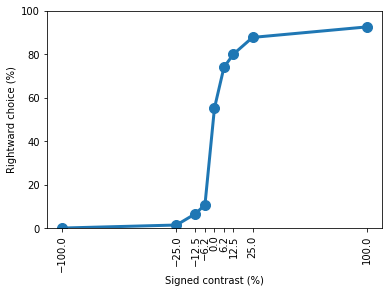

In [54]:
contrast_performance = np.empty((contrasts.size))
for ic, c in enumerate(contrasts):
    contrast_idx = np.where(trials_day18.contrast == c)[0]
    if c < 0:
        contrast_performance[ic] = 1 - (np.sum(trials_day18.feedbackType[contrast_idx] == 1)
                                        / contrast_idx.shape[0])
    else:
        contrast_performance[ic] = (np.sum(trials_day18.feedbackType[contrast_idx] == 1)
                                    / contrast_idx.shape[0])


  
plt.plot(contrasts * 100, contrast_performance * 100, 'o-', lw=3, ms=10)
plt.ylim([0,100])
plt.xticks([*(contrasts * 100)])
plt.xlabel('Signed contrast (%)')
plt.ylabel('Rightward choice (%)')
plt.xticks(rotation=90)

You should now be familiar with the basics of how to search for and load data using ONE and how to do some simple analysis with data from the IBL task. To see how to replicate this tutorial using Datajoint, please see this [tutorial](../dj_intro/dj_intro).